# BDA08 - ML Competition Question Assignment (Bank Marketing Data Set)

## Author Name = Naveen Kumar

### Date = December, 24 2022

In [1]:
# Import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Datsset
df = pd.read_csv(r"C:\Users\navee\OneDrive\Desktop\IBA_BDA\ML_IBA_BDA\Assignment_ML\bank-market.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.isna().sum() # Chexk the missing values in an entrire column in a datqset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# Rename of Column 
df = df.rename(columns={"default":"credit_in_default",
                       "housing":"housing_loan",
                       "loan":"personal_loan",
                       "campaign":"contacted_during_campaign",
                       "pdays":"days_passed_last_contacted",
                       "previous":"contacted_before_campaign",
                       "poutcome":"previous_outcome",
                       "contact":"contact_type",
                       "month":"last_contacted_month",
                       "duration":"last_contact_duration_seconds",
                        "day":"date_of_Month",
                       "y":"client_subcribed"})
df.head()

,age,job,marital,education,credit_in_default,balance,housing_loan,personal_loan,contact_type,date_of_Month,last_contacted_month,last_contact_duration_seconds,contacted_during_campaign,days_passed_last_contacted,contacted_before_campaign,previous_outcome,client_subcribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [8]:
# Converted the Job column into mumeric on the basis of its weight 
encode_job = {'admin.':8,'blue-collar':10,'entrepreneur':4,'housemaid':2,'management':11,'retired':6,'self-employed':5,'services':7,'student':1,'technician':9,'unemployed':3,'unknown':0}
df.job = df.job.replace(encode_job)

In [9]:
df.marital.value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [10]:
'''Converted the Marital Column in to numeric, Ultimately Divorcee are Single, So I Encode Single and Divorcee
into 1 and Married into 2'''
encode_marital = {"single":1,"divorced":1,"married":2}
df.marital = df.marital.replace(encode_marital)

In [11]:
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [12]:
# Converted the Education column into numeric on the basis of the Levels of Education  
encode_education = {"unknown":0,"primary":1,"secondary":2,"tertiary":3}
df.education = df.education.replace(encode_education)

In [13]:
df.head()

,age,job,marital,education,credit_in_default,balance,housing_loan,personal_loan,contact_type,date_of_Month,last_contacted_month,last_contact_duration_seconds,contacted_during_campaign,days_passed_last_contacted,contacted_before_campaign,previous_outcome,client_subcribed
0,30,3,2,1,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,7,2,2,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,11,1,3,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,11,2,3,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,10,2,2,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [14]:
df.credit_in_default.value_counts()

no     4445
yes      76
Name: credit_in_default, dtype: int64

In [15]:
# Converted the Credit Default column into numeric based on 0 to No and Yes to 1  
encode_default = {"no":0,"yes":1}
df.credit_in_default = df.credit_in_default.replace(encode_default)

In [16]:
df.housing_loan.value_counts()

yes    2559
no     1962
Name: housing_loan, dtype: int64

In [17]:
# Converted the Housing loan column into numeric based on 0 to No and Yes to 1  
encode_housing = {"no":0,"yes":1}
df.housing_loan = df.housing_loan.replace(encode_housing)

In [18]:
df.personal_loan.value_counts()

no     3830
yes     691
Name: personal_loan, dtype: int64

In [19]:
# Converted the Personal Loan column into numeric based on 0 to No and Yes to 1  
encode_personal = {"no":0,"yes":1}
df.personal_loan = df.personal_loan.replace(encode_personal)

In [20]:
df.contact_type.value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact_type, dtype: int64

In [21]:
# Converted the Contact Type column into numeric based on 0 to Unknown & Telephone and 1 to Cellular  
encode_contact = {"unknown":0,"telephone":0,"cellular":1}
df.contact_type = df.contact_type.replace(encode_contact)

In [22]:
df.last_contacted_month.value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: last_contacted_month, dtype: int64

In [23]:
# Converted the Month Name into Month Number  in the Column of Last Month Contacted 
encode_month = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
df.last_contacted_month = df.last_contacted_month.replace(encode_month)

In [24]:
df.previous_outcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: previous_outcome, dtype: int64

In [25]:
# Converted the Previous Outcome column into numeric based on -1 to failure, 0 to Unknown and Other, and 1 to Success. 
encode_outcome = {"failure":-1,"unknown":0,"other":0,"success":1}
df.previous_outcome = df.previous_outcome.replace(encode_outcome)

In [26]:
df.client_subcribed.value_counts()

no     4000
yes     521
Name: client_subcribed, dtype: int64

In [27]:
# Converted the Clent Subcription column into numeric based on 0 to No and Yes to 1.
encode_subcribed = {"no":0,"yes":1}
df.client_subcribed = df.client_subcribed.replace(encode_subcribed)

In [28]:
df.age.unique()

array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
       26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
       51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
       62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
      dtype=int64)

In [29]:
# Converted the Age values into Groups by applying the binning method to Limit the column values.
df['age'] = pd.cut(df['age'], [19,30,40,50,60,87], labels=[20,30,40,50,60], include_lowest=True )

In [30]:
df['age'].value_counts()

30    1800
40    1162
50     800
20     632
60     127
Name: age, dtype: int64

In [31]:
# Converted the Last Contact Duration From Seconds to Minutes and Rename the Column accordingly.
df["last_contact_duration_seconds"] = (df["last_contact_duration_seconds"] / 60).round(decimals=2)
df = df.rename(columns={"last_contact_duration_seconds":"last_contact_duration_minutes"})

In [32]:
# df['last_contact_duration_seconds'] = df['last_contact_duration_seconds'].astype('datetime64[s]').dt.strftime("%M:%S")

In [33]:
print(df["last_contact_duration_minutes"].unique().min())
print(df["last_contact_duration_minutes"].unique().max())

0.07
50.42


In [34]:
# Limit the values of the Last Contacted Duration column by applying the binning method.
df["last_contact_duration_minutes"] = pd.cut(df["last_contact_duration_minutes"], [0.07,1,2,3,4,5,10,50.42], labels=[1,2,3,4,5,10,20], include_lowest=True )

In [35]:
df["balance"].value_counts()

0       357
2        24
1        15
4        13
5        11
       ... 
539       1
1041      1
464       1
7702      1
1137      1
Name: balance, Length: 2353, dtype: int64

In [36]:
# Converted the Balance values into Range by applying the binning method to Limit the column values.
df["balance"] = pd.cut(df["balance"], [-3313,0,100,200,300,400,500,1000,2000,4000,71188], labels=[0,100,200,300,400,500,1000,2000,4000,5000], include_lowest=True )

In [37]:
df["balance"].value_counts()

0       723
1000    653
2000    594
100     533
4000    454
5000    433
200     351
300     298
400     242
500     240
Name: balance, dtype: int64

In [38]:
df["days_passed_last_contacted"].value_counts()

-1      3705
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: days_passed_last_contacted, Length: 292, dtype: int64

In [39]:
df["days_passed_last_contacted"].unique()

array([ -1, 339, 330, 176, 147, 241, 152, 105, 342, 101,   5,  92,  56,
       170, 182, 297, 196, 460, 137, 367, 145, 169, 207, 266, 288, 168,
       345, 436,  90, 183, 146, 335, 347, 119,   7, 271, 181,  88, 141,
       126,  61, 373, 351, 242,  62,  91, 308, 250, 172, 265,  78,  28,
        79,   1, 188, 167,  89, 164, 462, 209, 321, 254,  94, 364,  96,
       356, 149, 363, 275, 325, 341, 260, 358,  87, 303,  98, 327, 337,
       322, 102,  99, 370,  84, 212,  63,  81, 191, 360, 332,  80,  85,
       247, 150, 175, 382, 261, 336,  58, 206, 112, 199, 133, 208, 253,
       135, 278, 140, 298, 273, 124, 281, 162, 323, 349, 117,   2, 256,
       333, 116, 268, 136, 198, 357, 259, 353, 174, 371, 205, 246,  69,
       315, 110, 461, 184, 270, 127, 187,  64, 130, 346, 100, 352, 808,
       113, 378, 292, 287, 107, 293, 139, 138, 193, 274,  97, 103, 359,
       185, 674, 211, 300, 334, 280, 479,  95, 262, 362, 225,   3, 366,
        60, 190, 368, 122, 343, 131, 365, 299, 115, 316, 180, 15

In [40]:
# Limit the values of the Days passed last contact column by applying the binning method.
df["days_passed_last_contacted"] = pd.cut(df["days_passed_last_contacted"], [-1,0,871], labels=[-1,1], include_lowest=True )

In [41]:
df.head()

,age,job,marital,education,credit_in_default,balance,housing_loan,personal_loan,contact_type,date_of_Month,last_contacted_month,last_contact_duration_minutes,contacted_during_campaign,days_passed_last_contacted,contacted_before_campaign,previous_outcome,client_subcribed
0,20,3,2,1,0,2000,0,0,1,19,10,2,1,-1,0,0,0
1,30,7,2,2,0,5000,1,1,1,11,5,4,1,1,4,-1,0
2,30,11,1,3,0,2000,1,0,1,16,4,4,1,1,1,-1,0
3,20,11,2,3,0,2000,1,1,0,3,6,4,4,-1,0,0,0
4,50,10,2,2,0,0,1,0,0,5,5,4,1,-1,0,0,0


# Machine Learning Logistic Regression

In [42]:
# Define X Variable
X = df.drop("client_subcribed",axis=1)

In [43]:
# Define y Variable
y = df["client_subcribed"]

In [44]:
# Import Hold-out Splitting Technique
from sklearn.model_selection import train_test_split 

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 42) # 30-70 standard rule

In [46]:
# Import Logistic Regression ALgo
from sklearn.linear_model import LogisticRegression 

In [47]:
# object
modelLogR = LogisticRegression()

In [48]:
# Fit the Model
modelLogR.fit(X_train,y_train)

C:\Users\navee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
#Prediction
preLogR = modelLogR.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, accuracy_score # Classification Report

In [51]:
print(classification_report(y_test,preLogR))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1205
           1       0.53      0.23      0.32       152

    accuracy                           0.89      1357
   macro avg       0.72      0.60      0.63      1357
weighted avg       0.87      0.89      0.87      1357



In [52]:
# Import Cross Validation,  K-Fold and Stratified K-Fold Splitting Technique
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score 

In [53]:
# Simple Kfold
kf1 = KFold(n_splits=10, random_state=42, shuffle=True)

# Stratified K-fold
Skf1 = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [54]:
scores_cv1_accuracy = cross_val_score(modelLogR, X, y, scoring='accuracy', cv=kf1, n_jobs=-1)
scores_cv1_precision = cross_val_score(modelLogR, X, y, scoring='precision', cv=kf1, n_jobs=-1)
scores_cv1_recall = cross_val_score(modelLogR, X, y, scoring='recall', cv=kf1, n_jobs=-1)


In [55]:
# --- Simple Kfold ---
print("Accuracy :",scores_cv1_accuracy.mean())
print("Precision :",scores_cv1_precision.mean())
print("Recall :",scores_cv1_recall.mean())


Accuracy : 0.8843149895485359
Precision : 0.49955806912409884
Recall : 0.22323310560068177


In [56]:
scores_skf1_accuracy = cross_val_score(modelLogR, X, y, scoring='accuracy', cv=Skf1, n_jobs=-1)
scores_skf1_precision = cross_val_score(modelLogR, X, y, scoring='precision', cv=Skf1, n_jobs=-1)
scores_skf1_recall = cross_val_score(modelLogR, X, y, scoring='recall', cv=Skf1, n_jobs=-1)


In [57]:
# --- stratified Kfold ----
print("Accuracy :",scores_skf1_accuracy.mean())
print("Precision :",scores_skf1_precision.mean())
print("Recall :",scores_skf1_recall.mean())


Accuracy : 0.8845391588036492
Precision : 0.4985289628671983
Recall : 0.19586357039187227


# Machine Learning KNN

In [58]:
# Import KNN Algo
from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.metrics import r2_score

In [59]:
modelKNN = KNeighborsClassifier(n_neighbors=3) 

In [60]:
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
preKNN=modelKNN.predict(X_test)

In [62]:
print(classification_report(y_test,preKNN))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1205
           1       0.40      0.22      0.29       152

    accuracy                           0.88      1357
   macro avg       0.65      0.59      0.61      1357
weighted avg       0.85      0.88      0.86      1357



In [63]:
# Simple Kfold
kf2 = KFold(n_splits=8, random_state=42, shuffle=True)

# Stratified K-fold
Skf2 = StratifiedKFold(n_splits=8, random_state=42, shuffle=True)

In [64]:
# --- Simple Kfold ---
scores_cv2_accuracy = cross_val_score(modelKNN, X, y, scoring='accuracy', cv=kf2, n_jobs=-1)
scores_cv2_precision = cross_val_score(modelKNN, X, y, scoring='precision', cv=kf2, n_jobs=-1)
scores_cv2_recall = cross_val_score(modelKNN, X, y, scoring='recall', cv=kf2, n_jobs=-1)

In [65]:
# --- Simple Kfold ---
print("Accuracy :",scores_cv2_accuracy.mean())
print("Precision :",scores_cv2_precision.mean())
print("Recall :",scores_cv2_recall.mean())

Accuracy : 0.8725933425060196
Precision : 0.39405089521632386
Recall : 0.20686948436173225


In [66]:
# --- stratified Kfold ----
scores_skf2_accuracy = cross_val_score(modelKNN, X, y, scoring='accuracy', cv=Skf2, n_jobs=-1)
scores_skf2_precision = cross_val_score(modelKNN, X, y, scoring='precision', cv=Skf2, n_jobs=-1)
scores_skf2_recall = cross_val_score(modelKNN, X, y, scoring='recall', cv=Skf2, n_jobs=-1)

In [67]:
# --- stratified Kfold ----
print("Accuracy :",scores_skf2_accuracy.mean())
print("Precision :",scores_skf2_precision.mean())
print("Recall :",scores_skf2_recall.mean())


Accuracy : 0.8721516463929453
Precision : 0.395067983397121
Recall : 0.20734265734265733


C:\Users\navee\AppData\Local\Temp\ipykernel_10624\4260473681.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


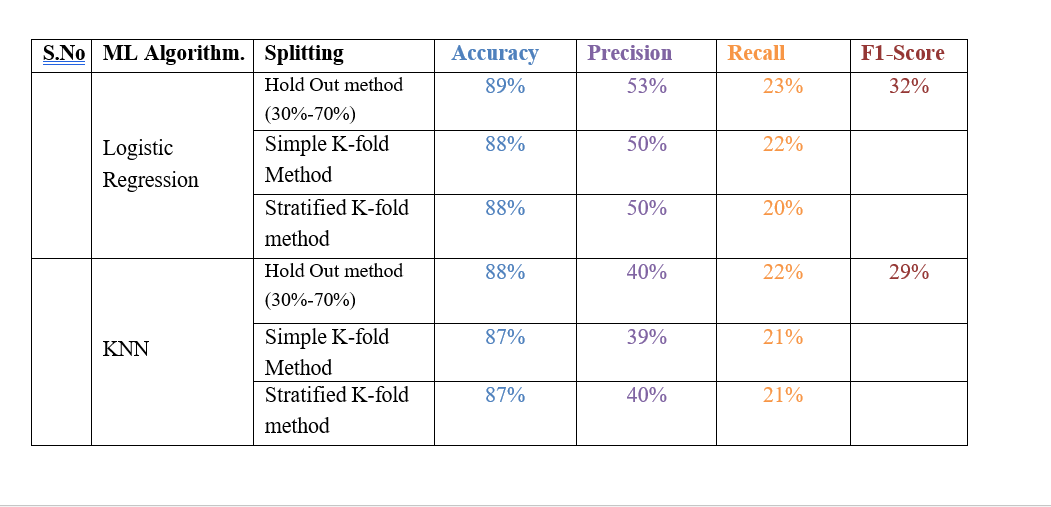

In [68]:
# Summary Table
from IPython.core.display import Image, display
display(Image(filename='Report.png'))